**Exploratory Data Analysis (EDA) is an important step in the data analysis process. It involves examining and visualizing the data to gain insights and identify patterns or anomalies. In Python, there are several libraries available for performing EDA, such as Pandas, NumPy, Matplotlib, and Seaborn. Here are some common steps to perform EDA in Python:**

**1. Importing the necessary libraries and loading the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/choclate-sales-project/choclate protfolio project - 11.csv')

**2. Understanding the dataset:**

In [3]:
# Checking basic information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    object
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    object
 7   Profit         300 non-null    object
 8   profit %       300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


In [4]:
# Checking the first few rows:
df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%


In [5]:
# removing this columns as the data in that columns is false will create them later
df = df.drop(['Profit', 'profit %', 'Cost'], axis=1)

In [6]:
df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9
2,Husein Augar,USA,Almond Choco,$959,147,12
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6
4,Curtice Advani,UK,White Choc,"$2,100",414,13


In [7]:
# Accessing all rows and columns using loc
df.loc[:,:].head(10)

,Sales Person,Geography,Product,Amount,Units,cost per unit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9
2,Husein Augar,USA,Almond Choco,$959,147,12
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6
4,Curtice Advani,UK,White Choc,"$2,100",414,13
5,Ram Mahesh,USA,Peanut Butter Cubes,"$8,869",432,12
6,Curtice Advani,Australia,Smooth Sliky Salty,"$2,681",54,6
7,Brien Boise,USA,After Nines,"$5,012",210,10
8,Ches Bonnell,Australia,50% Dark Bites,"$1,281",75,12
9,Gigi Bohling,New Zealand,50% Dark Bites,"$4,991",12,12


In [8]:
# Accesing all rows and selected columns
df.loc[:, ['Sales Person', 'Product']].head(10)

,Sales Person,Product
0,Ram Mahesh,70% Dark Bites
1,Brien Boise,Choco Coated Almonds
2,Husein Augar,Almond Choco
3,Carla Molina,Drinking Coco
4,Curtice Advani,White Choc
5,Ram Mahesh,Peanut Butter Cubes
6,Curtice Advani,Smooth Sliky Salty
7,Brien Boise,After Nines
8,Ches Bonnell,50% Dark Bites
9,Gigi Bohling,50% Dark Bites


In [9]:
df.loc[:, 'Sales Person':'Amount']

,Sales Person,Geography,Product,Amount
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624"
1,Brien Boise,USA,Choco Coated Almonds,"$6,706"
2,Husein Augar,USA,Almond Choco,$959
3,Carla Molina,Canada,Drinking Coco,"$9,632"
4,Curtice Advani,UK,White Choc,"$2,100"
...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841"
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018"
298,Carla Molina,New Zealand,Raspberry Choco,$714


In [10]:
df.loc[2:9, 'Sales Person':'Amount']

,Sales Person,Geography,Product,Amount
2,Husein Augar,USA,Almond Choco,$959
3,Carla Molina,Canada,Drinking Coco,"$9,632"
4,Curtice Advani,UK,White Choc,"$2,100"
5,Ram Mahesh,USA,Peanut Butter Cubes,"$8,869"
6,Curtice Advani,Australia,Smooth Sliky Salty,"$2,681"
7,Brien Boise,USA,After Nines,"$5,012"
8,Ches Bonnell,Australia,50% Dark Bites,"$1,281"
9,Gigi Bohling,New Zealand,50% Dark Bites,"$4,991"


In [11]:
# By using iloc for Accessing columns in indexing
df.iloc[5:9, 1:3]

,Geography,Product
5,USA,Peanut Butter Cubes
6,Australia,Smooth Sliky Salty
7,USA,After Nines
8,Australia,50% Dark Bites


**3. Cleaning the data:**

In [12]:
# Checking for missing values:
df.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
dtype: int64

**4. Exploring the data:**

In [13]:
#  Descriptive statistics:
df.describe()

,Units,cost per unit
count,300.000000,300.000000
mean,152.200000,9.473333
std,118.099499,3.457717
min,0.000000,3.000000
25%,54.000000,6.000000
50%,124.500000,9.000000
75%,220.500000,12.000000
max,525.000000,17.000000


In [14]:
df

,Sales Person,Geography,Product,Amount,Units,cost per unit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9
2,Husein Augar,USA,Almond Choco,$959,147,12
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6
4,Curtice Advani,UK,White Choc,"$2,100",414,13
...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12


In [15]:
# removing dollar symbol and comma in the Amount column to conver it to flaot from object, 
# which we can use for further calculations 
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].str.replace('$','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [16]:
# converting the Amount column to float
df['Amount'] = df['Amount'].astype(float)

In [17]:
# checking the data_types of all the columns as you can see the type of Amount is converted to float
df.dtypes

Sales Person      object
Geography         object
Product           object
Amount           float64
Units              int64
cost per unit      int64
dtype: object

In [18]:
# filtering the rows greater than 500 in units
filter = df['Units'] > 500
df[filter]

,Sales Person,Geography,Product,Amount,Units,cost per unit
57,Gunar Cockshoot,India,Choco Coated Almonds,7777.0,504,9
70,Oby Sorrel,Australia,50% Dark Bites,5586.0,525,12
101,Barr Faughny,Canada,Organic Choco Syrup,798.0,519,17
145,Brien Boise,Australia,Milk Bars,819.0,510,9


In [19]:
filter1 = df['Product'] == '50% Dark Bites'
# filter2 = (df['Geography'] == 'India') | (df['Geography'] == 'Canada')
filter2 = (df['Geography'] == 'India')
filter3 = (df['Geography'] == 'Canada')
df[filter1 & (filter2 | filter3)]

,Sales Person,Geography,Product,Amount,Units,cost per unit
185,Gunar Cockshoot,India,50% Dark Bites,7259.0,276,12
192,Ches Bonnell,India,50% Dark Bites,1932.0,369,12


In [20]:
# Creating new column as column name Cost(Units x cost per unit) using numpy
df['Cost'] = np.multiply(df['Units'], df['cost per unit'])
df.head()
# OR, we can also do
# df['Cost'] = df['Units'] * df['cost per unit']

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114,14,1596
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459,9,4131
2,Husein Augar,USA,Almond Choco,959.0,147,12,1764
3,Carla Molina,Canada,Drinking Coco,9632.0,288,6,1728
4,Curtice Advani,UK,White Choc,2100.0,414,13,5382


In [21]:
df.dtypes

Sales Person      object
Geography         object
Product           object
Amount           float64
Units              int64
cost per unit      int64
Cost               int64
dtype: object

In [22]:
# Using groupby on products and summing the amount to get total amounts of all the products
total = df.groupby('Product')
total.Amount.sum()

Product
50% Dark Bites          43183.0
70% Dark Bites          66500.0
85% Dark Bars           35378.0
99% Dark & Pure         44744.0
After Nines             66283.0
Almond Choco            33551.0
Baker's Choco Chips     70273.0
Caramel Stuffed Bars    72373.0
Choco Coated Almonds    71967.0
Drinking Coco           52150.0
Eclairs                 63721.0
Fruit & Nut Bars        56644.0
Manuka Honey Choco      58009.0
Milk Bars               47271.0
Mint Chip Choco         62111.0
Orange Choco            54712.0
Organic Choco Syrup     69461.0
Peanut Butter Cubes     69160.0
Raspberry Choco         68971.0
Smooth Sliky Salty      39263.0
Spicy Special Slims     37772.0
White Choc              57372.0
Name: Amount, dtype: float64

In [23]:
total.sum()

,Amount,Units,cost per unit,Cost
Product,,,,
50% Dark Bites,43183.0,2022,132,24264
70% Dark Bites,66500.0,2802,224,39228
85% Dark Bars,35378.0,1044,45,5220
99% Dark & Pure,44744.0,1956,112,15648
After Nines,66283.0,2052,160,20520
Almond Choco,33551.0,1566,132,18792
Baker's Choco Chips,70273.0,2142,102,12852
Caramel Stuffed Bars,72373.0,3207,150,32070
Choco Coated Almonds,71967.0,2301,108,20709


In [24]:
df['Geography'].unique()

array(['New Zealand', 'USA', 'Canada', 'UK', 'Australia', 'India'],
      dtype=object)

In [25]:
group = df.groupby(['Product','Sales Person','Geography'])
group.sum().head(20)

Amount  Units  cost per unit  \
Product        Sales Person    Geography                                    
50% Dark Bites Barr Faughny    New Zealand   1057.0     54             12   
               Carla Molina    UK            3976.0     72             12   
               Ches Bonnell    Australia     1281.0     75             12   
                               India         1932.0    369             12   
                               New Zealand   6608.0    225             12   
                               USA           4606.0     63             12   
               Gigi Bohling    New Zealand   4991.0     12             12   
               Gunar Cockshoot India         7259.0    276             12   
                               USA           2415.0    255             12   
               Oby Sorrel      Australia     5586.0    525             12   
                               USA           3472.0     96             12   
70% Dark Bites Brien Boise     New Zealand     42.0    150             14   
                               UK            7021.0    183             14   
                               USA           3598.0     81             14   
               Carla Molina    Canada        6118.0    174             14   
                               New Zealand   1526.0    240             14   
               Ches Bonnell    Australia    10129.0    312             14   
                               New Zealand   6454.0     54             14   
                               USA           6755.0    252             14   
               Curtice Advani  India         3402.0    366             14   

                                            Cost  
Product        Sales Person    Geography          
50% Dark Bites Barr Faughny    New Zealand   648  
               Carla Molina    UK            864  
               Ches Bonnell    Australia     900  
                               India        4428  
                               New Zealand  2700  
                               USA           756  
               Gigi Bohling    New Zealand   144  
               Gunar Cockshoot India        3312  
                               USA          3060  
               Oby Sorrel      Australia    6300  
                               USA          1152  
70% Dark Bites Brien Boise     New Zealand  2100  
                               UK           2562  
                               USA          1134  
               Carla Molina    Canada       2436  
                               New Zealand  3360  
               Ches Bonnell    Australia    4368  
                               New Zealand   756  
                               USA          3528  
               Curtice Advani  India        5124

In [26]:
group.get_group(('50% Dark Bites','Barr Faughny','New Zealand'))

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost
204,Barr Faughny,New Zealand,50% Dark Bites,1057.0,54,12,648


array([[<AxesSubplot:title={'center':'Amount'}>,
        <AxesSubplot:title={'center':'Units'}>],
       [<AxesSubplot:title={'center':'cost per unit'}>,
        <AxesSubplot:title={'center':'Cost'}>]], dtype=object)

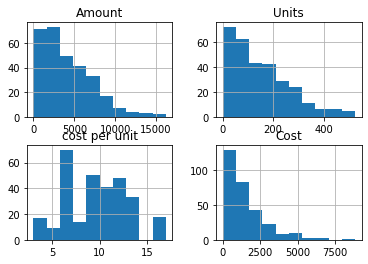

In [27]:
df.hist()

<AxesSubplot:xlabel='Units'>

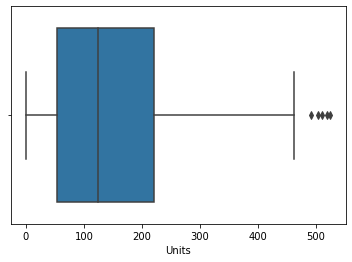

In [28]:
sns.boxplot(x='Units', data=df)


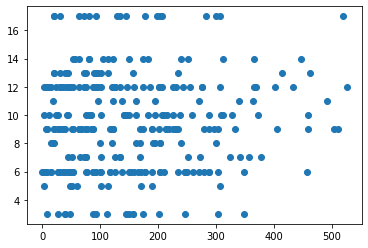

In [29]:
plt.scatter(df['Units'], df['cost per unit'])


**5. Analyzing the relationships between variables:**

In [30]:
# Correlation matrix:
df.corr()

,Amount,Units,cost per unit,Cost
Amount,1.000000,0.026546,0.025820,0.018165
Units,0.026546,1.000000,0.057467,0.882103
cost per unit,0.025820,0.057467,1.000000,0.425895
Cost,0.018165,0.882103,0.425895,1.000000


<AxesSubplot:xlabel='Units', ylabel='cost per unit'>

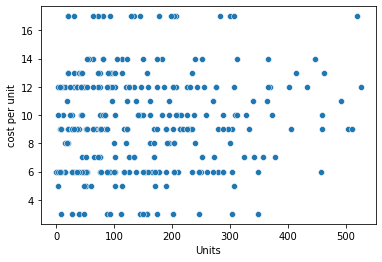

In [31]:
sns.scatterplot(x='Units', y='cost per unit', data=df)


In [32]:
df.tail()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost
295,Gunar Cockshoot,New Zealand,Almond Choco,938.0,366,12,4392
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841.0,303,6,1818
297,Barr Faughny,UK,Peanut Butter Cubes,4018.0,126,12,1512
298,Carla Molina,New Zealand,Raspberry Choco,714.0,231,12,2772
299,Husein Augar,Australia,White Choc,3850.0,102,13,1326
